# Stroke Prediction with KNN & SVM

By Ron Marom 20.5.2021

[Stroke Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)


Research topic: STROKE (שבץ)

Research question: Based on your data, **what are the chances of you having a stroke?**

Main goal of the study: to know if you are in a good mode with regard to having a stroke (if you see you are not in a good mode- you probably will do something about it. - A lot of lives will be saved)


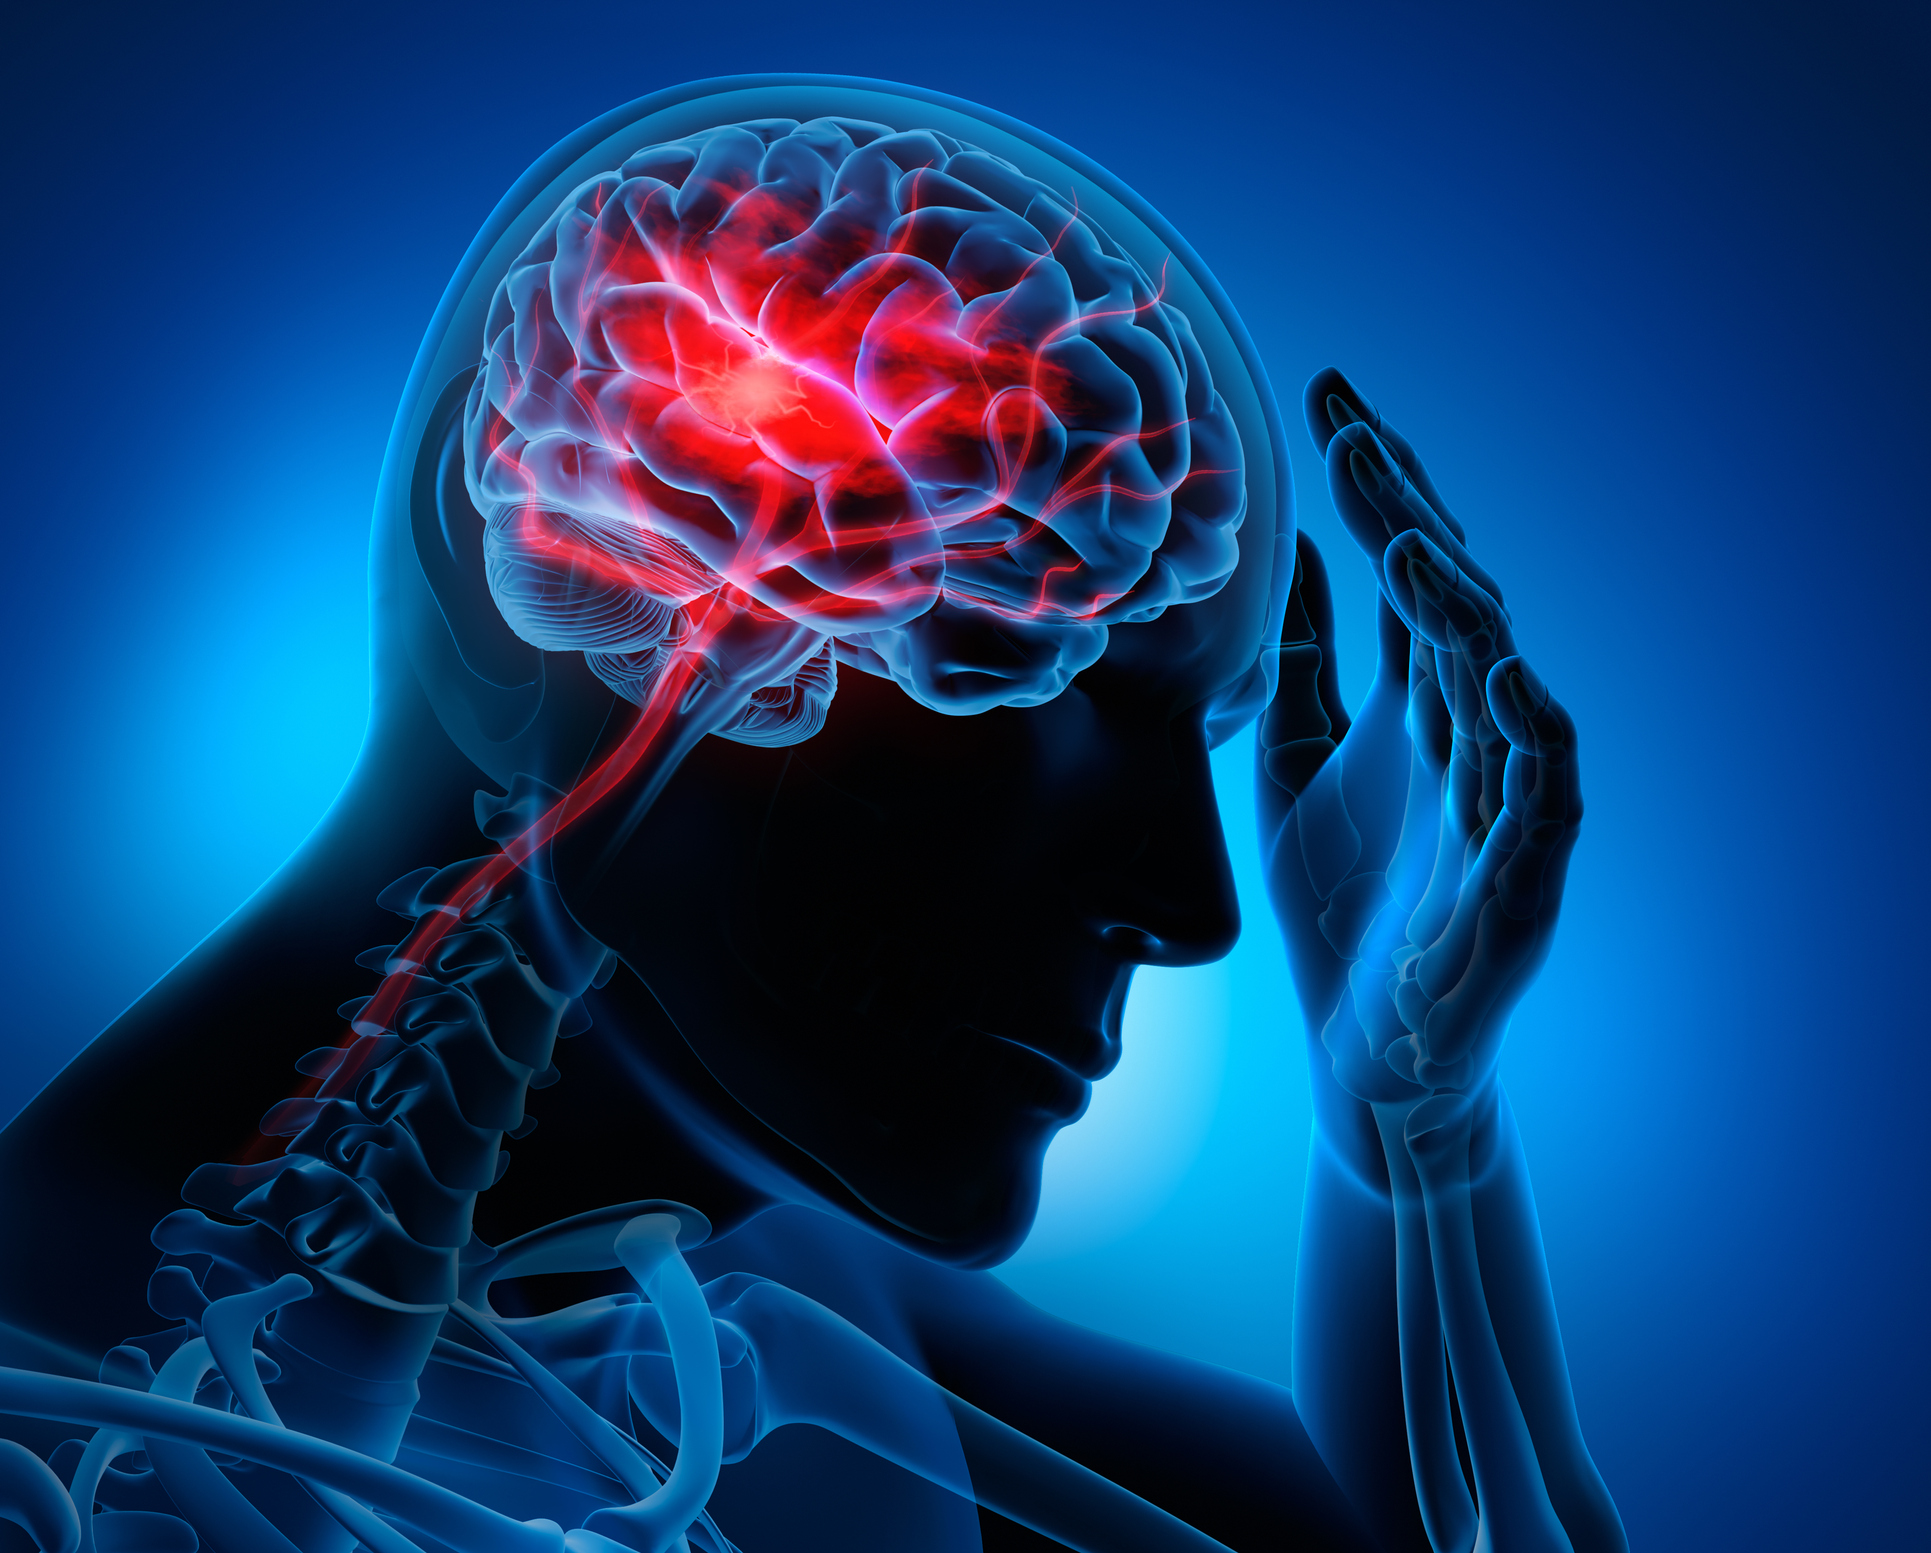

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
import statistics

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# תגים מהדאטה סט

id - מספר מזהה

gender - מגדר

age - גיל

hypertension - לחץ יתר

heart_disease - מחלות לב

ever_married - אי פעם התחתן/נה

work_type - סוג עבודה

Residence_type - אזור מגורים

avg_glucose_level - רמת גלוקוז ממוצעת

bmi - בי אם איי

smoking_status - סטטוס עישון

stroke - חווה/תה שבץ

# תגים שיווצרו

formerly smoked -עישן/ה בעבר

never smoked -  מעולם לא עישן/ה

smokes - מעשן/ת

Never_worked -מעולם לא עבד/ה

Private - סוג עבודתו/ה פרטי

Self-employed -  עצמאי/ת (סוג עבודתו/ה)

Govt_job - עובד/ת בעבודה ממשלתית

children - עבוד/ת עם ילדים

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


מעביר אינדקס ועמודות ויוצר סטטיסטיקה תיאורית
ומציג המידע כמו: ממוצע, מינימום, חציון, מקסימום, סטיית תקן ועוד (על כל המשתנים המספריים בבסיס הנתונים)


Transposes index and columns and Generate descriptive statistics.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


prints information about the DataFrame including the index dtype and columns, non-null values and memory usage.

In [ ]:
df.select_dtypes(include="object").nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

 הבעיה שהייתה עם זה שלא אמר אם הוא אישה או גבר הייתה לפני העדכון עם קוד זה כך שלא היה ניתן לראות את הבעיה

 shows how much uniques there are in each object column

#  טיפול במספר הרואוז

In [ ]:
print(df["stroke"].value_counts())
df = df.sort_values('stroke',ascending=False)
df = df[0:498]
print(df["stroke"].value_counts())


0    4861
1     249
Name: stroke, dtype: int64
1    249
0    249
Name: stroke, dtype: int64


ניתן לראות בפלט של לפני הקיצוץ בנתונים שיש המון שלא חטפו שבץ ומעט מאוד כ4% מהנתונים שכן

 כעת חילקתי את הנתונים לחצי חצי (כך שחצי חטפו שבץ וחצי לא חטפו שבץ)

 prints how much had not and had had stroke. Then, sorted the values of the stroke in the DataFrame, then cut the df that there will the same number for those who had and not had stroke.

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
171,60739,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
159,34567,Female,81.0,1,0,Yes,Self-employed,Rural,74.02,25.0,never smoked,1
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3418,38938,Female,24.0,0,0,No,Private,Rural,159.70,25.7,Unknown,0
3420,13219,Male,5.0,0,0,No,children,Urban,84.50,15.8,Unknown,0
3401,34257,Male,17.0,0,0,No,Govt_job,Urban,68.91,23.0,Unknown,0
3421,3003,Female,51.0,0,0,Yes,Govt_job,Rural,85.59,30.5,never smoked,0


In [ ]:
# pd.set_option('display.max_rows', None)  כדי לראות את כל הטבלאות במחברת בשלמותן יש להריץ שורה זו
print(df[0:249].shape)
df[0:249]

(249, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
171,60739,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
159,34567,Female,81.0,1,0,Yes,Self-employed,Rural,74.02,25.0,never smoked,1
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
83,66638,Female,68.0,1,0,No,Self-employed,Urban,79.79,29.7,never smoked,1
82,26727,Female,79.0,0,0,No,Private,Rural,88.92,22.9,never smoked,1
81,26015,Female,66.0,0,0,Yes,Self-employed,Urban,101.45,NaN,Unknown,1
80,57419,Male,59.0,0,0,Yes,Private,Rural,96.16,44.1,Unknown,1


אלה שקיבלו שבץ
 מספרם ומספר העמודות


In [ ]:
print(df[249:498].shape)
df[249:498]

(249, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3492,69789,Female,44.0,0,0,Yes,Private,Rural,58.19,37.1,Unknown,0
3493,40076,Female,46.0,0,0,Yes,Private,Rural,70.11,24.2,never smoked,0
3491,33252,Female,24.0,0,0,No,Private,Rural,97.95,34.7,Unknown,0
3490,17745,Male,79.0,1,0,Yes,Self-employed,Urban,84.88,28.7,formerly smoked,0
3489,57539,Female,68.0,0,0,Yes,Private,Rural,233.59,43.9,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3418,38938,Female,24.0,0,0,No,Private,Rural,159.70,25.7,Unknown,0
3420,13219,Male,5.0,0,0,No,children,Urban,84.50,15.8,Unknown,0
3401,34257,Male,17.0,0,0,No,Govt_job,Urban,68.91,23.0,Unknown,0
3421,3003,Female,51.0,0,0,Yes,Govt_job,Rural,85.59,30.5,never smoked,0


 אלה שלא קיבלו שבץ
 מספרם ומספר העמודות


In [ ]:
print("=>", df[0:249].shape == df[249:498].shape)

=> True


# כעת בעית ה
# Imbalanced Classes
# כבר לא מתקיימת והמודל יעבוד כראוי

(הנתונים אכן מחולקים חצי חצי (חצי חטפו שבץ חצי לא חטפו שבץ))

# Graphs

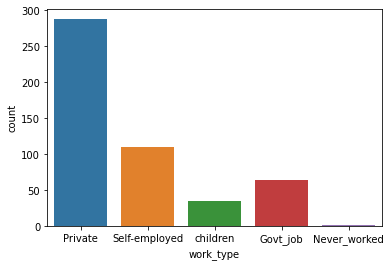

In [ ]:
sns.countplot(data=df,x='work_type');

בדיקה האם ההתפלגות הנה הגיונית
 של מספר העובדים בכל עבודה בדאטה

לדעתי התשובה היא כן לכן בהמשך יהיה גרף העוסק בסוג העבודה


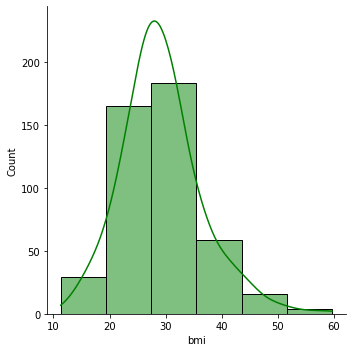

In [ ]:
sns.displot(df['bmi'],kde=True,color='green',bins=6);


בדיקה האם ההתפלגות הנה הגיונית

 רואים בשש עמודות את מאזן הבי אם איי בדאטה

 התפלגות הבי אם איי הינה הגיונית ומוכנה לשימוש בגרפים


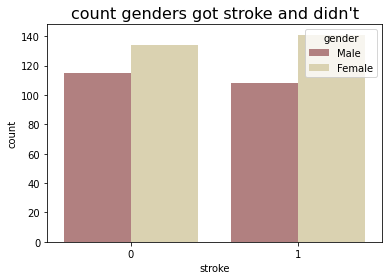

In [ ]:
sns.countplot(x='stroke',hue='gender',data=df,palette='pink')
plt.title("count genders got stroke and didn't",fontsize=16);

רואים בגרף ארבע עמודות. שתיים לאלו שחטפו שבץ ושתיים לאלו שלא חטפו שבץ. כל עמודה הנה מין (זכר או נקבה) ורואים כמה יש מכל אחד

 המסקנה הנה שאין הבדל בין גברים לנשים מבחינת שכיחות קיום השבץ

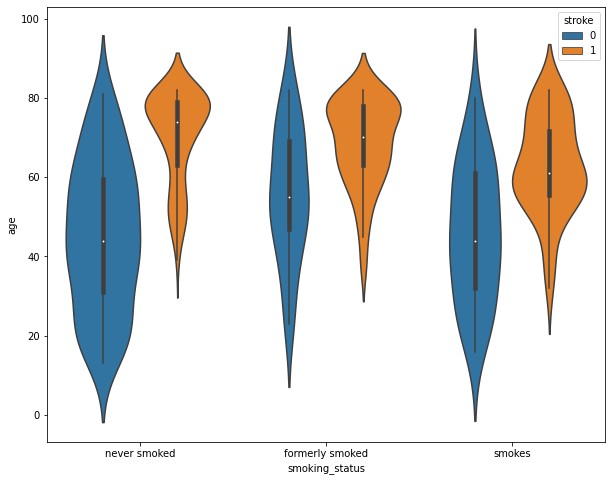

In [ ]:
plt.figure(figsize = (10,8))
sns.violinplot(x='smoking_status',y='age', hue="stroke", scale="count", order=["never smoked", "formerly smoked", "smokes"],data=df);

רואים בגרף מספר דברים, ביניהם: לכל סטטוס עישון יש האם חטף או לא חטף שבץ ועוביים של הצורות מסמל את מספר האנשים שהם באוכלוסיה המדוברת ובגיל המסוים (ציר וואי- ציר הוואי הוא הגיל). ישנה הנקודה הלבנה וכו

 המסקנה מהגרף הינה: שהעישון הינו גורם מסביר לשבץ בגיל מוקדם

 :ניתוח הגרף

 מעשנים בגילאי 60 בסיכוי מאוד גבוה יקבלו שבץ בעוד שאנשים שמעולם לא עישנו יקבלו את השבץ (ככל הנראה מזקנה) רק בגיליאים מתקדמים כמו 80. כמו כן, ניתן לראות כי לקבוצה של המעשנים לשעבר השבץ יופיע בגילאים שבין 60 ל80 בסיכוי גבוה יותר

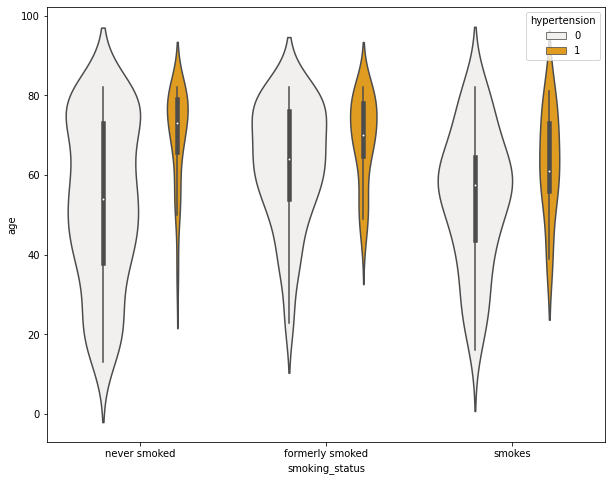

In [ ]:
plt.figure(figsize = (10,8))
sns.violinplot(x='smoking_status',y='age', hue="hypertension", scale="count", order=["never smoked", "formerly smoked", "smokes"], color="orange",data=df);

רואים בגרף מספר דברים, ביניהם: לכל סטטוס עישון יש האם מצוי בלחץ יתר או לא בלחץ יתר ועוביים של הצורות מסמל את מספר האנשים שהם באוכלוסיה המדוברת ובגיל המסוים (ציר וואי- ציר הוואי הוא הגיל). ישנה הנקודה הלבנה וכו

  המסקנה מהגרף הינה: בקרב המעשנים היקף הלחץ הינו גבוה יותר בגילאים צעירים יותר

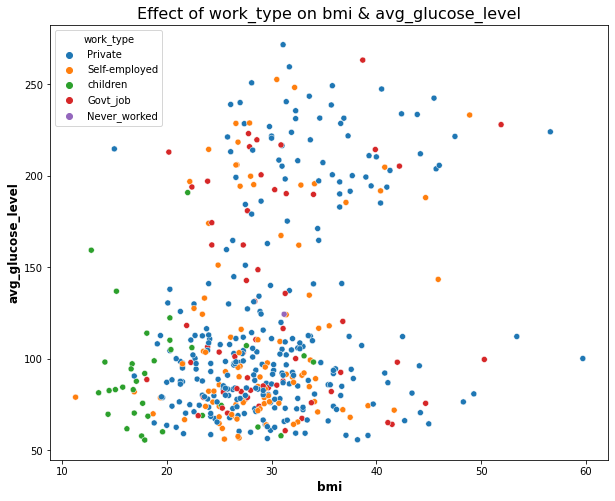

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "bmi", y = "avg_glucose_level", data = df, hue = "work_type")
plt.xlabel("bmi",fontsize=12,fontweight='bold')
plt.ylabel("avg_glucose_level",fontsize=12,fontweight='bold')
plt.title("Effect of work_type on bmi & avg_glucose_level",fontsize=16);

 size of graph 8x10

setting x label and y label and fronts

in addition title

 בגרף רואים נקודות בצבעים כך שצבע מסמל סוג עבודה, ציר האיקס הינו בי אם איי ורואים את השפעתו על רמת הגלוקוז הממוצעת בדם

 :מסקנות בולטות מהגרף

 רוב העובדים עם ילדים, בעלי בי אם איי וממוצע גלוקוז בדם נמוכים
 כמעט בכל הגרף ישנם עובדים בתחום הפרטי לכן ניתן להסיק שישנו מגוון של תתי עבודות ב:עבודה_פרטית וכך הנתונים מפוזרים בהתאם לשוני העבודות

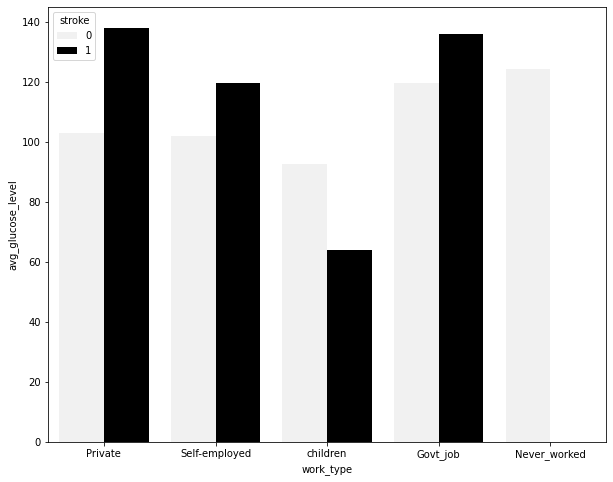

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = "work_type", y = "avg_glucose_level", data = df, hue = "stroke", ci=None, color="black");

 רואים בגרף מספר דברים, ביניהם: לכל סוג עבודה יש האם חטף שבץ או לא חטף שבץ ורואים את ההשפעות של סוג העבודה על רמת הגלוקוז הממוצעת בדם (ציר וואי- ציר הוואי הוא רמת הגלוקוז הממוצעת בדם)1


 :מסקנות בולטות מהגרף

 בכל סוגי העבודות רמת הגלוקוז הממוצעת בדם בקרב אלה שלא קיבלו שבץ היא מאוד דומה, לעומת זאת רואים כי בקרב האוכלוסיה שקיבלה שבץ רמת הגלוקוז הרבה יותר גבוהה בכלל ובפרט בהתייחס לאלה שלא קיבלו שבץ, למעט העובדים עם ילדים
 מכאן, שניתן להעלות השערה שעבודה עם ילדים חושפת את העובדים לסיכוי נמוך יותר לשבץ

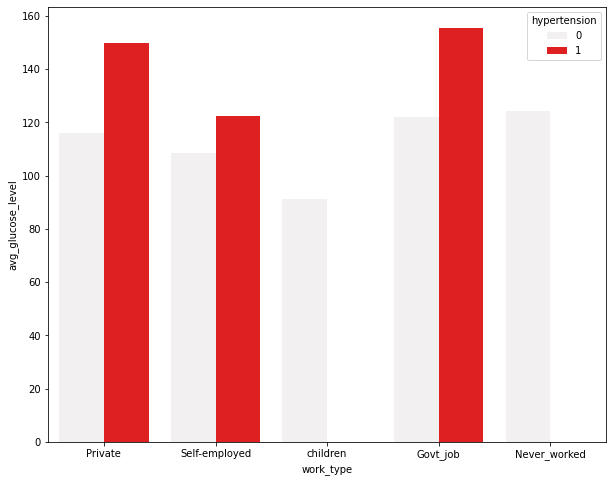

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = "work_type", y = "avg_glucose_level", data = df, hue = "hypertension", ci=None, color="red");

  רואים בגרף מספר דברים, ביניהם: לכל סוג עבודה יש האם מצוי בלחץ יתר או לא מצוי בלחץ יתר ורואים את ההשפעות של סוג העבודה על רמת הגלוקוז הממוצעת בדם (ציר וואי- ציר הוואי הוא רמת הגלוקוז הממוצעת בדם)9

 :מסקנות בולטות מהגרף

 כל העובדים עם ילדים לא מצויים בלחץ יתר! בדיוק כמו אנשים שלא עובדים כלל! בנוסף, רמת הגלוקוז הממוצעת שלהם (העובדים עם ילדים) לא עוברת את 100
 בכל עבודה מלבד עבודה עם ילדים, מי שנתון בלחץ יתר הינו בעל רמת גלוקוז בדם ממוצעת גבוהה יותר מאשר אלה שלא נתונים בלחץ יתר

# Data cleaning + Feature engineering  :כעת

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
171,60739,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
159,34567,Female,81.0,1,0,Yes,Self-employed,Rural,74.02,25.0,never smoked,1
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3418,38938,Female,24.0,0,0,No,Private,Rural,159.70,25.7,Unknown,0
3420,13219,Male,5.0,0,0,No,children,Urban,84.50,15.8,Unknown,0
3401,34257,Male,17.0,0,0,No,Govt_job,Urban,68.91,23.0,Unknown,0
3421,3003,Female,51.0,0,0,Yes,Govt_job,Rural,85.59,30.5,never smoked,0


In [ ]:
df = df.drop(["id"], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
171,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
158,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
159,Female,81.0,1,0,Yes,Self-employed,Rural,74.02,25.0,never smoked,1
160,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3418,Female,24.0,0,0,No,Private,Rural,159.70,25.7,Unknown,0
3420,Male,5.0,0,0,No,children,Urban,84.50,15.8,Unknown,0
3401,Male,17.0,0,0,No,Govt_job,Urban,68.91,23.0,Unknown,0
3421,Female,51.0,0,0,Yes,Govt_job,Rural,85.59,30.5,never smoked,0


מורידים את עמודה איי די כיוון שהיא מיותרת

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 3436
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             498 non-null    object 
 1   age                498 non-null    float64
 2   hypertension       498 non-null    int64  
 3   heart_disease      498 non-null    int64  
 4   ever_married       498 non-null    object 
 5   work_type          498 non-null    object 
 6   Residence_type     498 non-null    object 
 7   avg_glucose_level  498 non-null    float64
 8   bmi                456 non-null    float64
 9   smoking_status     498 non-null    object 
 10  stroke             498 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 66.7+ KB


prints information about the DataFrame including the index dtype and columns, non-null values and memory usage.

In [ ]:
df['gender'] = df['gender'].replace({'Female':0, 'Male':1})
df['ever_married'] = df['ever_married'].replace({'No':0, 'Yes':1})
df["Residence_type"] = df['Residence_type'].replace({'Rural':0, 'Urban':1})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
171,0,79.0,1,1,0,Self-employed,0,60.94,NaN,never smoked,1
158,0,71.0,0,0,1,Self-employed,1,195.71,34.1,formerly smoked,1
159,0,81.0,1,0,1,Self-employed,0,74.02,25.0,never smoked,1
160,0,76.0,0,0,1,Private,1,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3418,0,24.0,0,0,0,Private,0,159.70,25.7,Unknown,0
3420,1,5.0,0,0,0,children,1,84.50,15.8,Unknown,0
3401,1,17.0,0,0,0,Govt_job,1,68.91,23.0,Unknown,0
3421,0,51.0,0,0,1,Govt_job,0,85.59,30.5,never smoked,0


 object to int (columns) - those with 2 classes - אין חשיבות למספר אם 0 או 1... אם היו יותר מ2 לדוגמה 1 2 3 יש חשיבות לסדר


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 3436
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             498 non-null    int64  
 1   age                498 non-null    float64
 2   hypertension       498 non-null    int64  
 3   heart_disease      498 non-null    int64  
 4   ever_married       498 non-null    int64  
 5   work_type          498 non-null    object 
 6   Residence_type     498 non-null    int64  
 7   avg_glucose_level  498 non-null    float64
 8   bmi                456 non-null    float64
 9   smoking_status     498 non-null    object 
 10  stroke             498 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 66.7+ KB


prints information about the DataFrame including the index dtype and columns, non-null values and memory usage.

In [ ]:
df.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  42
smoking_status        0
stroke                0
dtype: int64

prints all the columns with the number of null in each

In [ ]:
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
171,0,79.0,1,1,0,Self-employed,0,60.94,29.266667,never smoked,1
158,0,71.0,0,0,1,Self-employed,1,195.71,34.100000,formerly smoked,1
159,0,81.0,1,0,1,Self-employed,0,74.02,25.000000,never smoked,1
160,0,76.0,0,0,1,Private,1,57.92,29.266667,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3418,0,24.0,0,0,0,Private,0,159.70,25.700000,Unknown,0
3420,1,5.0,0,0,0,children,1,84.50,15.800000,Unknown,0
3401,1,17.0,0,0,0,Govt_job,1,68.91,23.000000,Unknown,0
3421,0,51.0,0,0,1,Govt_job,0,85.59,30.500000,never smoked,0


חסר נתון של בי אם איי ל42 אנשים לכן לכל אחד שחסר הנתון נשים את ממוצע הבי אם איי של האנשים שהבי אם איי שלהם ידוע

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

כעת אין ערכים חסרים בכל אחת מהעמודות

In [ ]:
smoking_status_dummies = pd.get_dummies(df['smoking_status'],drop_first=False)
smoking_status_dummies

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
171,0,0,1,0
158,0,1,0,0
159,0,0,1,0
160,0,1,0,0
...,...,...,...,...
3418,1,0,0,0
3420,1,0,0,0
3401,1,0,0,0
3421,0,0,1,0


 smoking_statusיש בעיה ב

 אין חשיבות למרחק שיהיה אם נהפוך את כל היוניק לאינט (יש יותר משני יוניקים), לכן
 עושים דאמיז

 One hot encoding

 Unknown יש המון שדות עם



In [ ]:
smoking_status_dummies.drop(['Unknown'] , axis=1, inplace=True)
smoking_status_dummies

,formerly smoked,never smoked,smokes
0,1,0,0
171,0,1,0
158,1,0,0
159,0,1,0
160,1,0,0
...,...,...,...
3418,0,0,0
3420,0,0,0
3401,0,0,0
3421,0,1,0


מורידים את העמודה

Unknown

מהדאטה


In [ ]:
work_type_dummies = pd.get_dummies(df['work_type'],drop_first=False)
work_type_dummies

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
171,0,0,0,1,0
158,0,0,0,1,0
159,0,0,0,1,0
160,0,0,1,0,0
...,...,...,...,...,...
3418,0,0,1,0,0
3420,0,0,0,0,1
3401,1,0,0,0,0
3421,1,0,0,0,0


 work_typeיש בעיה ב

 אין חשיבות למרחק שיהיה אם נהפוך את כל היוניק לאינט (יש יותר משני יוניקים), לכן
 עושים דאמיז

 One hot encoding

In [ ]:
df = pd.concat([df,work_type_dummies, smoking_status_dummies],axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,0,0,1,0,0,1,0,0
171,0,79.0,1,1,0,Self-employed,0,60.94,29.266667,never smoked,1,0,0,0,1,0,0,1,0
158,0,71.0,0,0,1,Self-employed,1,195.71,34.100000,formerly smoked,1,0,0,0,1,0,1,0,0
159,0,81.0,1,0,1,Self-employed,0,74.02,25.000000,never smoked,1,0,0,0,1,0,0,1,0
160,0,76.0,0,0,1,Private,1,57.92,29.266667,formerly smoked,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,0,24.0,0,0,0,Private,0,159.70,25.700000,Unknown,0,0,0,1,0,0,0,0,0
3420,1,5.0,0,0,0,children,1,84.50,15.800000,Unknown,0,0,0,0,0,1,0,0,0
3401,1,17.0,0,0,0,Govt_job,1,68.91,23.000000,Unknown,0,1,0,0,0,0,0,0,0
3421,0,51.0,0,0,1,Govt_job,0,85.59,30.500000,never smoked,0,1,0,0,0,0,0,1,0


מאחדים את העמודות של

work_type_dummies

עם

smoking_status_dummies

עם הדאטה עצמו

In [ ]:
df = df.drop(["smoking_status", "work_type"], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,1,0,0
171,0,79.0,1,1,0,0,60.94,29.266667,1,0,0,0,1,0,0,1,0
158,0,71.0,0,0,1,1,195.71,34.100000,1,0,0,0,1,0,1,0,0
159,0,81.0,1,0,1,0,74.02,25.000000,1,0,0,0,1,0,0,1,0
160,0,76.0,0,0,1,1,57.92,29.266667,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,0,24.0,0,0,0,0,159.70,25.700000,0,0,0,1,0,0,0,0,0
3420,1,5.0,0,0,0,1,84.50,15.800000,0,0,0,0,0,1,0,0,0
3401,1,17.0,0,0,0,1,68.91,23.000000,0,1,0,0,0,0,0,0,0
3421,0,51.0,0,0,1,0,85.59,30.500000,0,1,0,0,0,0,0,1,0


להעיף מה שאין כבר צורך


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 3436
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             498 non-null    int64  
 1   age                498 non-null    float64
 2   hypertension       498 non-null    int64  
 3   heart_disease      498 non-null    int64  
 4   ever_married       498 non-null    int64  
 5   Residence_type     498 non-null    int64  
 6   avg_glucose_level  498 non-null    float64
 7   bmi                498 non-null    float64
 8   stroke             498 non-null    int64  
 9   Govt_job           498 non-null    uint8  
 10  Never_worked       498 non-null    uint8  
 11  Private            498 non-null    uint8  
 12  Self-employed      498 non-null    uint8  
 13  children           498 non-null    uint8  
 14  formerly smoked    498 non-null    uint8  
 15  never smoked       498 non-null    uint8  
 16  smokes             498 no

# Data correlation

In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
gender,1.000000,-0.012454,0.001545,0.137442,0.004753,-0.006221,0.094933,0.039626,-0.028267,-0.007947,0.049812,0.024827,-0.031704,0.005171,0.069671,-0.152707,0.094786
age,-0.012454,1.000000,0.288334,0.276126,0.537547,0.037788,0.288438,0.205053,0.588880,0.066662,-0.075297,0.021353,0.293407,-0.591504,0.223721,0.085871,0.024561
hypertension,0.001545,0.288334,1.000000,0.093979,0.093929,-0.021020,0.192618,0.114277,0.225378,0.008806,-0.020925,-0.068669,0.155928,-0.128256,0.113288,0.080774,0.034648
heart_disease,0.137442,0.276126,0.093979,1.000000,0.033444,0.027499,0.258451,0.047648,0.194630,0.000584,-0.016915,0.014097,0.048459,-0.103680,0.069285,-0.112709,0.141962
ever_married,0.004753,0.537547,0.093929,0.033444,1.000000,-0.050273,0.172794,0.253293,0.271598,0.011093,-0.081860,0.149615,0.130959,-0.501758,0.170639,0.025118,0.114417
Residence_type,-0.006221,0.037788,-0.021020,0.027499,-0.050273,1.000000,0.061401,-0.017998,0.028157,0.014433,-0.047453,-0.049657,0.028193,0.039593,0.004818,-0.032412,0.040313
avg_glucose_level,0.094933,0.288438,0.192618,0.258451,0.172794,0.061401,1.000000,0.260846,0.263708,0.071275,0.005143,0.065665,-0.052802,-0.135380,0.082512,0.014378,0.066625
bmi,0.039626,0.205053,0.114277,0.047648,0.253293,-0.017998,0.260846,1.000000,0.146415,0.056534,0.012558,0.165144,-0.015561,-0.370000,0.035469,0.082265,0.050038
stroke,-0.028267,0.588880,0.225378,0.194630,0.271598,0.028157,0.263708,0.146415,1.000000,0.012000,-0.044856,0.040663,0.096809,-0.243521,0.161337,-0.053581,0.074662
Govt_job,-0.007947,0.066662,0.008806,0.000584,0.011093,0.014433,0.071275,0.056534,0.012000,1.000000,-0.017225,-0.449709,-0.204468,-0.105582,-0.025580,0.051687,-0.002137


Compute pairwise correlation of columns, excluding NA/null values.

אפשר לראות את ההשפעה של כל אחת מהעמודות על כל אחת מהעמודות

In [ ]:
df.corr()[['stroke']]

,stroke
gender,-0.028267
age,0.588880
hypertension,0.225378
heart_disease,0.194630
ever_married,0.271598
Residence_type,0.028157
avg_glucose_level,0.263708
bmi,0.146415
stroke,1.000000
Govt_job,0.012000


רואים את ההשפעה של כל אחת מהעמודות על השבץ

In [ ]:
df.corr()[['stroke']].sort_values('stroke',ascending=False)

,stroke
stroke,1.000000
age,0.588880
ever_married,0.271598
avg_glucose_level,0.263708
hypertension,0.225378
heart_disease,0.194630
formerly smoked,0.161337
bmi,0.146415
Self-employed,0.096809
smokes,0.074662


רואים את ההשפעה של כל אחת מהעמודות על השבץ לפי מיון מספרי

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,498.0,0.447791,0.497767,0.00,0.000,0.000000,1.0000,1.00
age,498.0,54.553896,22.394275,0.08,41.000,59.000000,74.0000,82.00
hypertension,498.0,0.178715,0.383499,0.00,0.000,0.000000,0.0000,1.00
heart_disease,498.0,0.124498,0.330481,0.00,0.000,0.000000,0.0000,1.00
ever_married,498.0,0.769076,0.421847,0.00,1.000,1.000000,1.0000,1.00
Residence_type,498.0,0.528112,0.499711,0.00,0.000,1.000000,1.0000,1.00
avg_glucose_level,498.0,118.100261,54.829516,55.59,78.325,97.255000,143.2775,271.74
bmi,498.0,29.266667,6.912729,11.30,25.225,29.233333,32.3750,59.70
stroke,498.0,0.500000,0.500503,0.00,0.000,0.500000,1.0000,1.00
Govt_job,498.0,0.128514,0.334998,0.00,0.000,0.000000,0.0000,1.00


מעביר אינדקס ועמודות ויוצר סטטיסטיקה תיאורית
ומציג המידע כמו: ממוצע, מינימום, חציון, מקסימום, סטיית תקן ועוד (על כל המשתנים המספריים בבסיס הנתונים)


Transposes index and columns and Generate descriptive statistics.

# Prepare train and test data


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,1,0,0
171,0,79.0,1,1,0,0,60.94,29.266667,1,0,0,0,1,0,0,1,0
158,0,71.0,0,0,1,1,195.71,34.100000,1,0,0,0,1,0,1,0,0
159,0,81.0,1,0,1,0,74.02,25.000000,1,0,0,0,1,0,0,1,0
160,0,76.0,0,0,1,1,57.92,29.266667,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,0,24.0,0,0,0,0,159.70,25.700000,0,0,0,1,0,0,0,0,0
3420,1,5.0,0,0,0,1,84.50,15.800000,0,0,0,0,0,1,0,0,0
3401,1,17.0,0,0,0,1,68.91,23.000000,0,1,0,0,0,0,0,0,0
3421,0,51.0,0,0,1,0,85.59,30.500000,0,1,0,0,0,0,0,1,0


In [ ]:
X = df.drop(['stroke'],axis=1).to_numpy()
y = df['stroke'].to_numpy()
print("start: ",X.shape, y.shape)
X_train11,X_test11,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=41)
print("train: ", X_train11.shape, y_train.shape)
print("test1:  " , X_test11.shape, y_test.shape)


start:  (498, 16) (498,)
train:  (398, 16) (398,)
test1:   (100, 16) (100,)


בחרתי רנדום סיד מסוים למען לקיחת אותם נתונים לאימון וכן לבחינה

מחלקים לאימון ולבחינה (מה שנשאר) 20% לבחינה ו20% לאימון

ומציגים מימדים

# Feature scaling
[Feature Scaling with scikit-learn](https://benalexkeen.com/feature-scaling-with-scikit-learn/)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
def dis_np(np1):
  np2=np.zeros_like(np1)
  return np.linalg.norm(np1 - np2)

np2 = an array of zeros with the same shape and type as np1 (the given array)

Distance between point and the point of beginning of the axes - (0,0)

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame(X_train11).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,398.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
1,398.00,55.12,22.22,0.08,41.00,59.00,75.00,82.00
2,398.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00
3,398.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00
4,398.00,0.77,0.42,0.00,1.00,1.00,1.00,1.00
5,398.00,0.53,0.50,0.00,0.00,1.00,1.00,1.00
6,398.00,118.09,54.96,55.59,77.94,97.45,142.86,271.74
7,398.00,29.20,6.81,11.30,25.30,29.23,32.30,59.70
8,398.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00
9,398.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00


מעביר אינדקס ועמודות ויוצר סטטיסטיקה תיאורית.

Transposes index and columns and Generate descriptive statistics.

בקוד הנל, עושים זאת על האיקס אימון עם דיוק של 2 ספרות אחרי הנקודה

In [ ]:
# מספר ראשון משמאל של אס וי אם, מספר שני של קיי אן אן, מספר שלישי ממוצע של שניהם -weighted avg
# scaler = MinMaxScaler()  # 0.7502 0.6406 69.5
# scaler = StandardScaler() # 0.7297 0.7005 71.5
scaler = RobustScaler() # 0.7400 0.7404 74
# scaler = Normalizer() # 0.7497 0.7302 74

# fit and transfrom
X_train = scaler.fit_transform(X_train11)
X_test = scaler.transform(X_test11)

#pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame(X_train).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,398.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
1,398.00,-0.11,0.65,-1.73,-0.53,0.00,0.47,0.68
2,398.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00
3,398.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00
4,398.00,-0.23,0.42,-1.00,0.00,0.00,0.00,0.00
5,398.00,-0.47,0.50,-1.00,-1.00,0.00,0.00,0.00
6,398.00,0.32,0.85,-0.64,-0.30,0.00,0.70,2.68
7,398.00,-0.00,0.97,-2.56,-0.56,0.00,0.44,4.35
8,398.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00
9,398.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00


using Scale features using statistics that are robust to outliers. (RobustScaler())

then scaling with the scaler above:

Fit to data (X_train11), then transform it (לשנות צורה לשנות...ד).

Perform standardization by centering and scaling (X_test11)

 by fit the imputer calculates the means of columns from some data, and by transform it applies those means to some data (which is just replacing missing values with the means). If both these data are the same (i.e. the data for calculating the means and the data that means are applied to) you can use fit_transform which is basically a fit followed by a transform.

 :תרגום לאלו שצריכים

 לפי התאמה המחשב מחשב את אמצעי העמודות מתוך נתונים כלשהם, ועל ידי הפיכתו הוא מחיל אמצעים אלה על נתונים כלשהם (שזה רק החלפת ערכים חסרים באמצעים). אם שני הנתונים הללו זהים (כלומר הנתונים לחישוב האמצעים והנתונים שאמצעים מוחלים עליהם) תוכלו להשתמש בכושר fit_transform שהוא בעצם התאמה ואחריה טרנספורמציה.

In [ ]:
pd.DataFrame(X_train[:10]).apply(lambda x: dis_np(x),axis=1)

0   2.16
1   2.34
2   1.98
3   1.11
4   2.10
5   2.20
6   1.87
7   2.83
8   1.78
9   3.32
dtype: float64

מרחק מראשית הצירים עשר ראשונים

X_train

# KNN
### Chose parameters

befor changing n_neighbors to much bigger numbers:

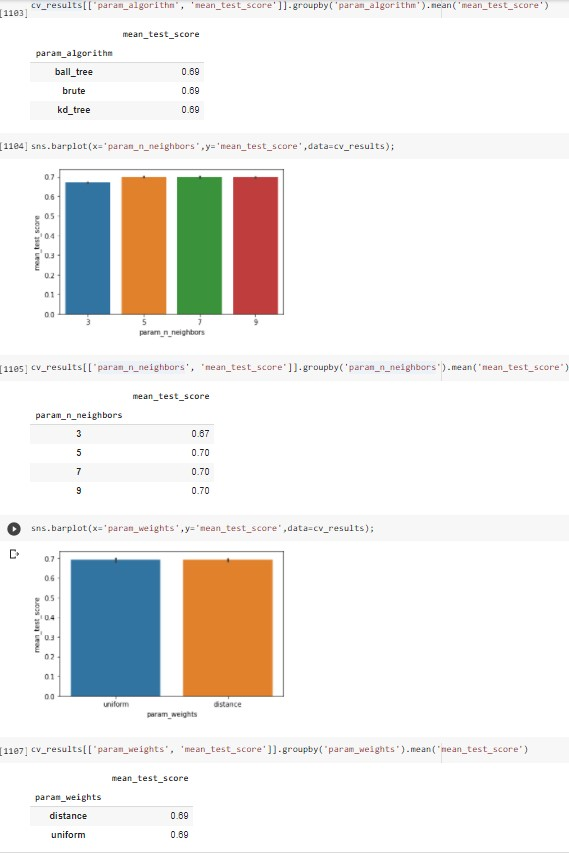

after changing:

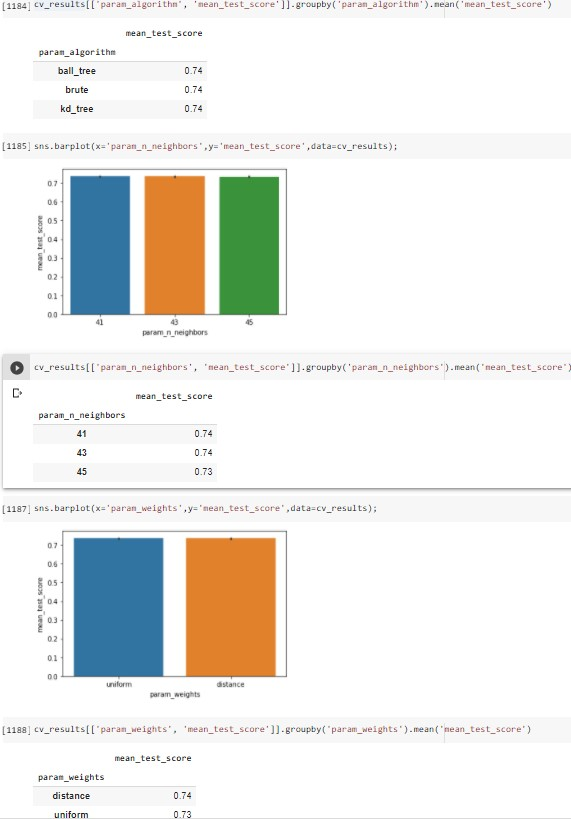

In [ ]:
t0 = time.time()
parameters = {
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'n_neighbors': [41,43,45],#found these are the best Kei's
              'weights' : ['uniform', 'distance']
             }
knn11 = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
knn11.fit(X_train, y_train)
cv_results = pd.DataFrame(knn11.cv_results_)
t1 = time.time()
print("time: {:.1f}".format(t1-t0))
cv_results.head(1)

time: 0.6


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00,0.00,0.01,0.00,ball_tree,41,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 41, ...",0.75,0.71,0.75,0.76,0.81,0.76,0.03,7


Selection of parameters for scanning and tuning

printing the time in seconds

In [ ]:
cv_results[['param_algorithm', 'param_n_neighbors', 'param_weights','mean_test_score','rank_test_score']]

,param_algorithm,param_n_neighbors,param_weights,mean_test_score,rank_test_score
0,ball_tree,41,uniform,0.76,7
1,ball_tree,41,distance,0.75,10
2,ball_tree,43,uniform,0.76,1
3,ball_tree,43,distance,0.75,16
4,ball_tree,45,uniform,0.76,4
5,ball_tree,45,distance,0.75,13
6,kd_tree,41,uniform,0.76,7
7,kd_tree,41,distance,0.75,10
8,kd_tree,43,uniform,0.76,1
9,kd_tree,43,distance,0.75,16


Selection and presentation of the parameters with their place in the table

In [ ]:
knn11.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 43, 'weights': 'uniform'}

Finding parameters in which we got the best result. If there are some, we will get the first row which is in the rank_test_score in place 1

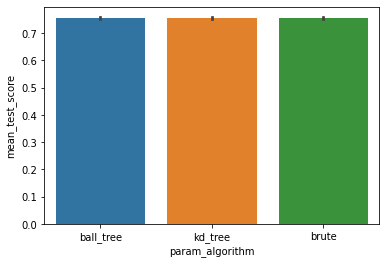

In [ ]:
sns.barplot(x='param_algorithm',y='mean_test_score',data=cv_results);

גרף המראה את השפעת האלגוריתם על ממוצע הטסט סקור

In [ ]:
cv_results[['param_algorithm', 'mean_test_score']].groupby('param_algorithm').mean('mean_test_score')

,mean_test_score
param_algorithm,
ball_tree,0.76
brute,0.76
kd_tree,0.76


טבלה המראה את השפעת האלגוריתם על ממוצע הטסט סקור (במספרים)

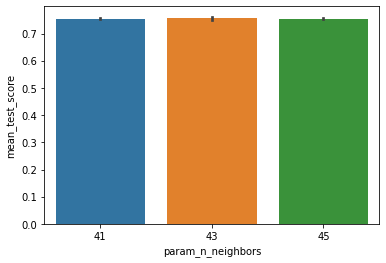

In [ ]:
sns.barplot(x='param_n_neighbors',y='mean_test_score',data=cv_results);

גרף המראה את השפעת הפרמטר אן (השכני באלגוריתם) על ממוצע הטסט סקור

In [ ]:
cv_results[['param_n_neighbors', 'mean_test_score']].groupby('param_n_neighbors').mean('mean_test_score')

,mean_test_score
param_n_neighbors,
41,0.76
43,0.76
45,0.76


טבלה המראה את השפעת הפרמטר אן (השכני באלגוריתם) על ממוצע הטסט סקור (במספרים)

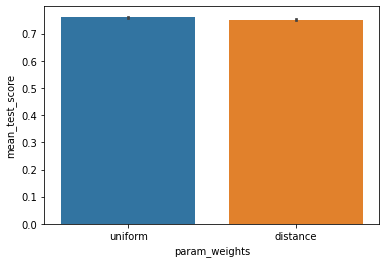

In [ ]:
sns.barplot(x='param_weights',y='mean_test_score',data=cv_results);

גרף המראה את השפעת הפרמטר

param_weights

In [ ]:
cv_results[['param_weights', 'mean_test_score']].groupby('param_weights').mean('mean_test_score')

,mean_test_score
param_weights,
distance,0.75
uniform,0.76


טבלה המראה את השפעת הפרמטר

param_weights

(במספרים)

### Train & evaluate performance

In [ ]:
knn1 = KNeighborsClassifier(
           algorithm = knn11.best_params_['algorithm'],
           n_neighbors = knn11.best_params_['n_neighbors'],
           weights = knn11.best_params_['weights']
           )
knn1.fit(X_train, y_train)
knn1.score(X_test, y_test)

0.74

נכניס את הסוגי פרמטרים שיצאו הכי טובים בפרמטרים לקיי אן אן קלאסיפאייר ונבצע חיזוי

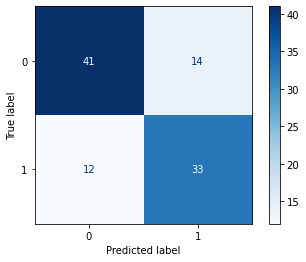

In [ ]:
plot_confusion_matrix(knn1, X_test, y_test,values_format="d",cmap='Blues');

:ניתן לראות בגרף ש

 מקרים שנחזו נכון כשבץ 33

 מקרים שנחזו נכון כלא שבץ 41

 מקרים שנחזו לא נכון ל:שבץ 14

 מקרים שנחזו לא נכון ל:לא שבץ 12


In [ ]:
pred1=knn1.predict(X_test)
print(classification_report(y_test,pred1,digits=4))

              precision    recall  f1-score   support

           0     0.7736    0.7455    0.7593        55
           1     0.7021    0.7333    0.7174        45

    accuracy                         0.7400       100
   macro avg     0.7379    0.7394    0.7383       100
weighted avg     0.7414    0.7400    0.7404       100



shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes.

# SVM
### Chose parameters

In [ ]:
t0 = time.time()
parameters = {
              'C':[0.1, 1, 10],
              'gamma':['scale', 'auto'],
              'kernel':('linear', 'poly','rbf', 'sigmoid')
             }
svm11 = GridSearchCV(SVC(), parameters, cv=5)
svm11.fit(X_train, y_train)
t1 = time.time()
print("time: {:.1f}".format(t1-t0))
cv_results = pd.DataFrame(svm11.cv_results_)
cv_results.head(1)

time: 0.8


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00,0.00,0.00,0.00,0.10,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.86,0.72,0.76,0.80,0.86,0.80,0.05,1


Selection of parameters for scanning and tuning

printing the time in seconds

In [ ]:
cv_results[['param_C', 'param_gamma', 'param_kernel','mean_test_score','rank_test_score']]

,param_C,param_gamma,param_kernel,mean_test_score,rank_test_score
0,0.10,scale,linear,0.80,1
1,0.10,scale,poly,0.67,22
2,0.10,scale,rbf,0.77,15
3,0.10,scale,sigmoid,0.78,11
4,0.10,auto,linear,0.80,1
5,0.10,auto,poly,0.51,24
6,0.10,auto,rbf,0.79,10
7,0.10,auto,sigmoid,0.78,12
8,1,scale,linear,0.80,3
9,1,scale,poly,0.74,17


Selection and presentation of the parameters with their place in the table

In [ ]:
svm11.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Finding parameters in which we got the best result. If there are some, we will get the first row which is in the rank_test_score in place 1

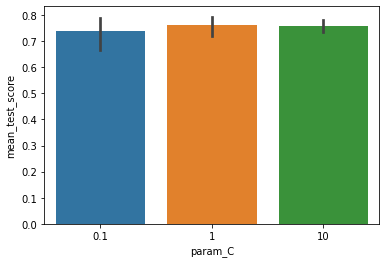

In [ ]:
sns.barplot(x='param_C',y='mean_test_score',data=cv_results);

גרף המראה את השפעת הפרמטר סי על ממוצע הטסט סקור

In [ ]:
cv_results[['param_C', 'mean_test_score']].groupby('param_C').mean('mean_test_score')

,mean_test_score
param_C,
0.10,0.74
1.00,0.76
10.00,0.76


(במספרים)טבלה המראה את השפעת הפרמטר סי על ממוצע הטסט סקור

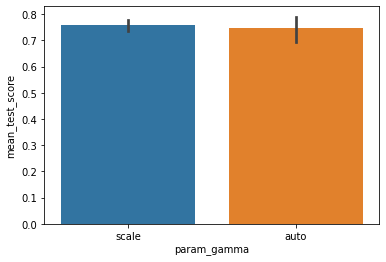

In [ ]:
sns.barplot(x='param_gamma',y='mean_test_score',data=cv_results);

גרף המראה את השפעת הפרמטר פאראם גאמא על ממוצע הטסט סקור

In [ ]:
cv_results[['param_gamma', 'mean_test_score']].groupby('param_gamma').mean('mean_test_score')

,mean_test_score
param_gamma,
auto,0.75
scale,0.76


(במספרים)טבלה המראה את השפעת הפרמטר פאראם גאמא על ממוצע הטסט סקור

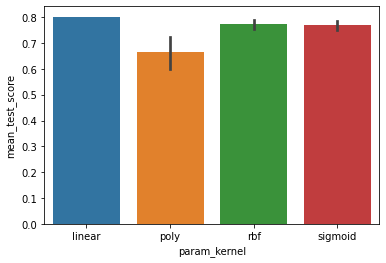

In [ ]:
sns.barplot(x='param_kernel',y='mean_test_score',data=cv_results);

גרף המראה את השפעת הפרמטר

param_kernel

In [ ]:
cv_results[['param_kernel', 'mean_test_score']].groupby('param_kernel').mean('mean_test_score')

,mean_test_score
param_kernel,
linear,0.80
poly,0.67
rbf,0.77
sigmoid,0.77


גרף המראה את השפעת הפרמטר

param_kernel

(במספרים)

### Train and evaluate performance

In [ ]:
svm1 = SVC(kernel = svm11.best_params_['kernel'],
           C = svm11.best_params_['C'],
           gamma = svm11.best_params_['gamma'])
svm1.fit(X_train, y_train)
svm1.score(X_test, y_test)

0.74

נכניס את הסוגי פרמטרים שיצאו הכי טובים בפרמטרים ונבצע חיזוי

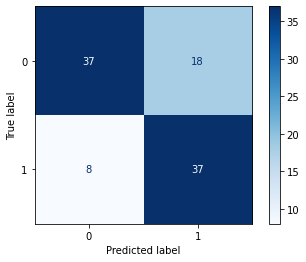

In [ ]:
plot_confusion_matrix(svm1, X_test, y_test,values_format="d",cmap='Blues');

:ניתן לראות בגרף ש

 מקרים שנחזו נכון כשבץ 37

 מקרים שנחזו נכון כלא שבץ 37

 מקרים שנחזו לא נכון ל:שבץ 18

 מקרים שנחזו לא נכון ל:לא שבץ 8


In [ ]:
pred1=svm1.predict(X_test)
print(classification_report(y_test,pred1,digits=4))

              precision    recall  f1-score   support

           0     0.8222    0.6727    0.7400        55
           1     0.6727    0.8222    0.7400        45

    accuracy                         0.7400       100
   macro avg     0.7475    0.7475    0.7400       100
weighted avg     0.7549    0.7400    0.7400       100



shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes.

 החלטתי בסוף לא לעשות את מה שנמצא כאן בהערה בטקסט (לכן לא רואים). השוואה של לפני ואחרי שלב ג' ל


 classification_report

 <!-- classification_report השוואה של

 לפני שלב ג ואחרי

 KNN before:



 KNN after:

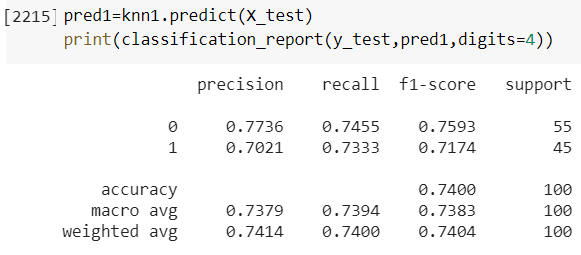

 SVM before:



 SVM after:

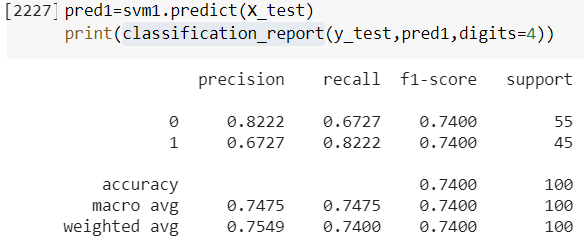 -->


מכאן ישנם קודים בהערה שעוזרים לקבל תצפית טובה על הממצאים. עודכנו לפני שלב ג בשל זמן ריצה רב כתוצאה מבדיקות נוספות ורבות. סוף התכנית

In [ ]:
# kn = []
# sv = []
# chosen_k = []
# scores = []
# bestk = 0
# countk = [0,0,0,0] # [count3,count5,count7,count9]
# for iteration in range(1000):
#   X = df.drop(['stroke'],axis=1).to_numpy()
#   y = df['stroke'].to_numpy()
#   X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
#   scaler = MinMaxScaler()
#   X_train = scaler.fit_transform(X_train)
#   X_test = scaler.transform(X_test)
#   for k in range(3,10,2):
#     knn1 = KNeighborsClassifier(n_neighbors = k)
#     knn1.fit(X_train,y_train)
#     score = knn1.score(X_test, y_test)
#     print("k = {} score test: {}".format(k,score))
#     scores.append(score)
#     chosen_k.append(k)
#   bestk = chosen_k[scores.index(max(scores))]
#   if (bestk == 3):
#     countk[0] += 1
#   elif (bestk == 5):
#     countk[1] += 1
#   elif (bestk == 7):
#     countk[2] += 1
#   else:
#     countk[3] += 1
#   chosen_k.clear()
#   scores.clear()
#   pred1 = knn1.predict(X_test)
#   kn.append(classification_report(y_test,pred1,digits=4, output_dict=True))
#   for kernel in ['linear','poly','rbf']:
#       svm1 = SVC(kernel=kernel,C=100)
#       svm1.fit(X_train, y_train)
#       print("kernel: {} score: {}".format(kernel,svm1.score(X_test,y_test)))
#   pred2 = svm1.predict(X_test)
#   sv.append(classification_report(y_test,pred2,digits=4, output_dict=True))

In [ ]:
# knn_mima0_pre = []
# knn_mima0_re = []
# knn_mima1_pre = []
# knn_mima1_re = []
# for i in kn:
#   knn_mima1_re.append(i["1"]["recall"])
#   knn_mima1_pre.append(i["1"]["precision"])
#   knn_mima0_re.append(i["0"]["recall"])
#   knn_mima0_pre.append(i["0"]["precision"])
# print("KNN\n 0- recall {}-{} mean:{} , precision  {}-{} mean:{}\n 1-  recall {}-{} mean:{}, precision  {}-{} mean:{}".format(min(knn_mima0_re), max(knn_mima0_re), statistics.mean(knn_mima0_re), min(knn_mima0_pre), max(knn_mima0_pre), statistics.mean(knn_mima0_pre), min(knn_mima1_re), max(knn_mima1_re), statistics.mean(knn_mima1_re), min(knn_mima1_pre), max(knn_mima1_pre), statistics.mean(knn_mima1_pre)))

In [ ]:
# sv_mima0_pre = []
# sv_mima0_re = []
# sv_mima1_pre = []
# sv_mima1_re = []
# for i in sv:
#   sv_mima1_re.append(i["1"]["recall"])
#   sv_mima1_pre.append(i["1"]["precision"])
#   sv_mima0_re.append(i["0"]["recall"])
#   sv_mima0_pre.append(i["0"]["precision"])
# print("SVC\n 0- recall {}-{} mean:{} , precision  {}-{} mean:{}\n 1-  recall {}-{} mean:{}, precision  {}-{} mean:{}".format(min(sv_mima0_re), max(sv_mima0_re), statistics.mean(sv_mima0_re), min(sv_mima0_pre), max(sv_mima0_pre), statistics.mean(sv_mima0_pre), min(sv_mima1_re), max(sv_mima1_re), statistics.mean(sv_mima1_re), min(sv_mima1_pre), max(sv_mima1_pre), statistics.mean(sv_mima1_pre)))

In [ ]:
# bestk =  countk.index(max(countk))
# if (bestk == 0):
#   bestk = 3
# elif (bestk == 1):
#   bestk = 5
# elif (bestk == 2):
#   bestk = 7
# else:
#   bestk = 9
# print("best k to pick for knn: ", bestk)

#**Personal reflection:**

I learned a lot from the "Learning to the a Project" section (the tools and knowledge I gained as a useful use of libraries and functions).

**There were some difficulties**

Including:

A low percentage of people who had a stroke and thus the model actually failed to predict a stroke but only no stroke. (classic case of: IMBALANCED DATASET)

To overcome this problem I had to stabilize the percentages in the data set of non-stroke per stroke.
By comparing the amount of people who received a stroke to the amount of those who did not.
In other words, I downloaded a large amount of the rows (only those who did not have a stroke) so that the model would work properly and bring correct results ie (כלומר) did not attach importance to the number of rows of no stroke.

I must point out that this difficulty was, in my opinion, the real challenge in the project and was very enjoyable. To get to the solution of the problem that was: I tried to get to the solution and analyze the problem that probably happened, I got help from people, also from my teacher Ariel and also from the internet.

There was another difficulty that was (before I came to the conclusion that much of the data must be cut). I did not understand why after I did the dictionary part, that is, I gave values ​​to uniques - that in gender, the "info" did not change to int but remained an object. It turned out in the end that there was a **person** who did not write whether he was a woman or a man and instead of leaving a blank space he put another string. To solve the problem: I wrote a condition that went over gender and found who is not a man  and not a woman and return the indexes. Then, I droped these indexes, and the problem was solved.
In the end there was no need for this code because it was blown away from the data as written above. Despite this, it was important for me to note this because I was facing a real and realistic problem in our day to day life and dealing with it with the tools I was given, reminds of how important and interesting the material we are studying.

In addition to all of the above, I learned to work and understand data. How to choose a scaler, parameters and actually I knew almost nothing of this wrold, and now I feel secure of talking about this wrold because of my knowledge.

##Note
It is important to note that the codes indicated in the comment above this text, are from (the end of) step A.

#:מסקנות לגבי אלגוריתמים

##קיי אן אן

ניתן לראות שהאנים שבחרתי הינם דיי גבוהים לאחר ניסוי וטעיה עד להגעתי אליהם ולאחר שבחנתי גדולים מהם הם נבחרו. מכאן שמספר האנים לדאטה סט זה צריך להיות גדול אך לא גדול מדי

האלגוריתם עובד מהר יותר מאלגוריתם אס וי סי

ועוד

##אס וי סי

לאחר בדיקות רבות של קומבינציות רבות הגעתי למסקנה שעליי "להשאיר" את הפרמטרים שהומלצו כיוון שהם נתנו את התוצאות הכי טובות

פרמטר הליניאר הינו הפרמטר הכי טוב בפרמטר הקרנל משמעותית ביחס לאחרים כמעט בכל הסקיילרים מכאן שדאטה סט זה הינו מתאים בפרמטר קרנל לפרמטר ליניארי

האלגוריתם עובד יותר לאט מאלגוריתם קיי אן אן בכמעט פי 2

ועוד

#:מסקנות לגבי הנתונים

יש הרבה יותר אנשים שלא חטפו שבץ מאשר אלו שכן (4%)

 לאחר ניתוחי הגרפים הכתובים הנל והגרפים עצמם ניתן להסיק מספר מסקנות ברורות כשביניהן שעישון אינו בריא ואינו מומלץ, שעבודה עם ילדים הנה מבחינה בריאותית סוג העבודה הכי טובה ובה אין בכלל לחץ יתר ואולי המסקנה הכי חשובה מהנתונים שהיא שעבודה עם ילדים חושפת את העובדים לסיכוי נמוך יותר לשבץ

מסקנה נוספת הנה שישנו מגוון של תתי עבודות ב:עבודה_פרטית

ועוד

#classification - report

##Explenation

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:


TN / True Negative: when a case was negative and predicted negative


TP / True Positive: when a case was positive and predicted positive


FN / False Negative: when a case was positive but predicted negative


FP / False Positive: when a case was negative but predicted positive





##How it calculates???:

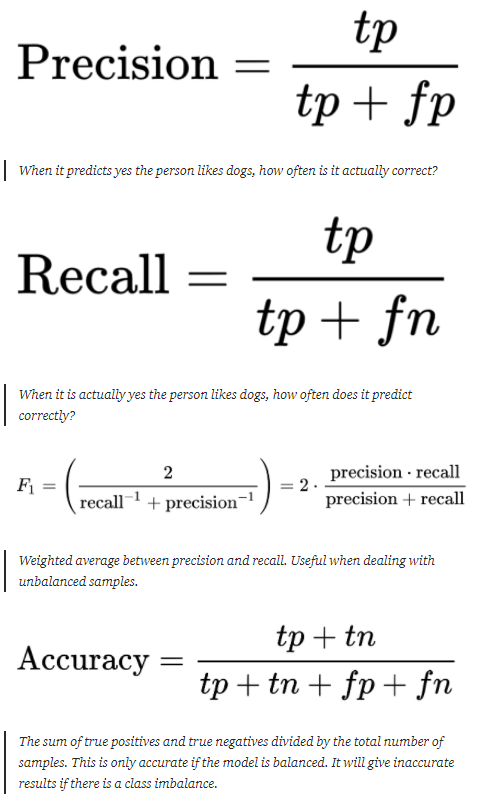